Here I import all wee need 

In [171]:
import numpy as np
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from glob import glob
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from typing import Tuple
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pickle
from scipy.signal import butter, lfilter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import random
import os
import math
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import normalize
import scipy.stats as stats
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import svm
import sklearn.metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

preprocessing

In [2]:
cs = ['F' , 'N' , 'O' , 'S' , 'Z']
x = []
y = []

for ind in range(len(cs)):
    data_dir = './data/' + cs[ind] + '/*.txt'
    all_f = glob(data_dir)
    if(len(all_f) == 0):
        data_dir = './data/' + cs[ind] + '/*.TXT'
        all_f = glob(data_dir)
    #print(all_f)
    for f in all_f:
        a = open(f,'r')
        data = [float(i) for i in a.readlines()]
        x.append(data)
        y.append(ind)
        # print(data)
        # print(len(data))

x = np.array(x)
y = np.array(y)
print(x.shape)

(500, 4097)


In [3]:
pickle.dump(x, open('x.pkl' , 'wb'))
pickle.dump(y, open('y.pkl' , 'wb'))

filter

In [4]:
seed = 57

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

x = pickle.load(open('x.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

x_normal = np.concatenate((x[:300], x[400:]), axis=0)
x_seizure = x[300:400]
#print(x_normal.shape)
#print(x_seizure.shape)
sampling_freq = 173.6 #based on info from website

b, a = butter(3, [0.5,40], btype='bandpass',fs=sampling_freq)


x_normal_filtered = np.array([lfilter(b,a,x_normal[ind,:]) for ind in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[ind,:]) for ind in range(x_seizure.shape[0])])
#print(x_normal.shape)
#print(x_seizure.shape)


x_normal = x_normal_filtered
x_seizure = x_seizure_filtered

x = np.concatenate((x_normal,x_seizure))
y = np.concatenate((np.zeros((400,1)),np.ones((100,1))))

Here I extract 15 features which are time domain or frequency domain features. then I plot each of them for better visualization.


In [5]:
#time domain features
median = np.median(x, axis=1)#median
max = np.max(x, axis=1)#max
min=np.min(x, axis=1)#min
var=np.var(x,axis=1)#variance
power=np.mean(x**2,axis=1)#power
peak=np.max(np.abs(x),axis=1)#peak
p2p=np.ptp(x,axis=1)#peaktopeak
crestFactor=np.max((np.abs(x))/np.sqrt(np.mean(x**2)),axis=1)#crestfactor
mean=np.mean(x,axis=1)#mean
std=np.std(x,axis=1)#standard deviation
pulseIndicator=np.max((np.abs(x)/np.mean(x)),axis=1)#pulse indicator


fft or fast Fourier transform .It converts a signal into individual spectral components and thereby provides frequency information about the signal

In [6]:
#frecuncy-domain
ft = fft(x)
S = np.abs(ft**2)/len(x)
max_f=np.max(S,axis=1)
sum_f=np.sum(S,axis=1)
mean_f=np.mean(S,axis=1)
var_f=np.var(S,axis=1)
peak_f=np.max(np.abs(S),axis=1)


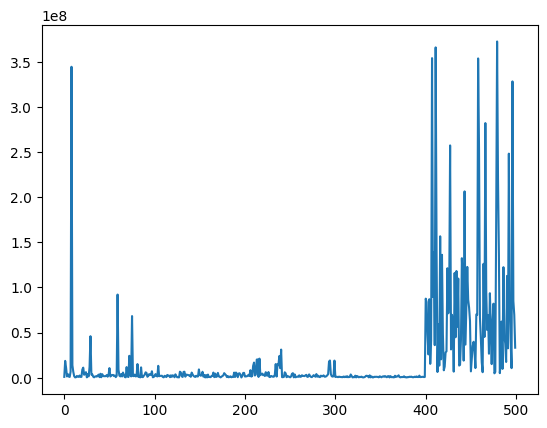

In [210]:
plt.plot(peak_f)

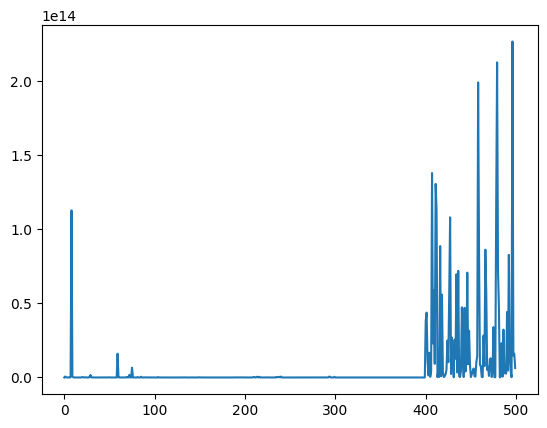

In [211]:
plt.plot(var_f)

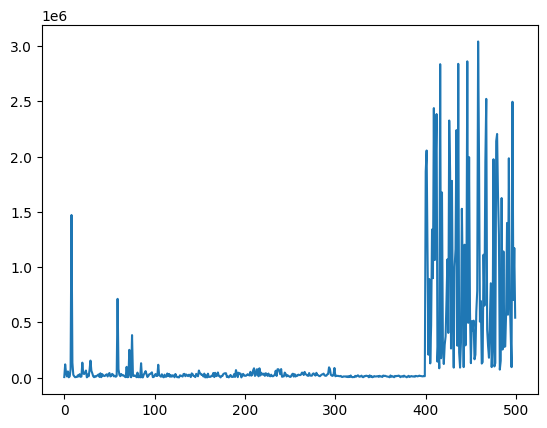

In [212]:
plt.plot(mean_f)

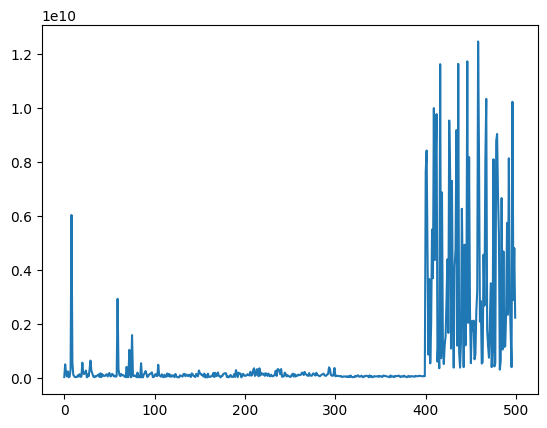

In [213]:
plt.plot(sum_f)

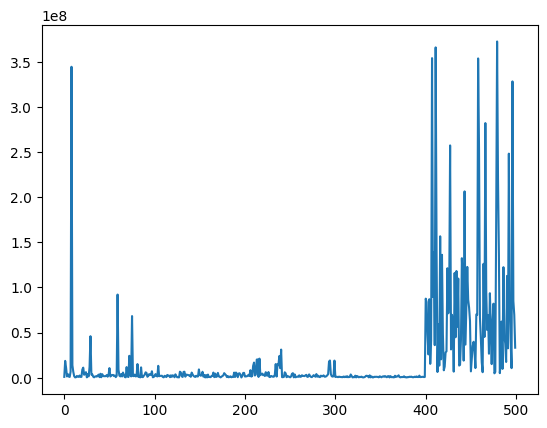

In [214]:
plt.plot(max_f)

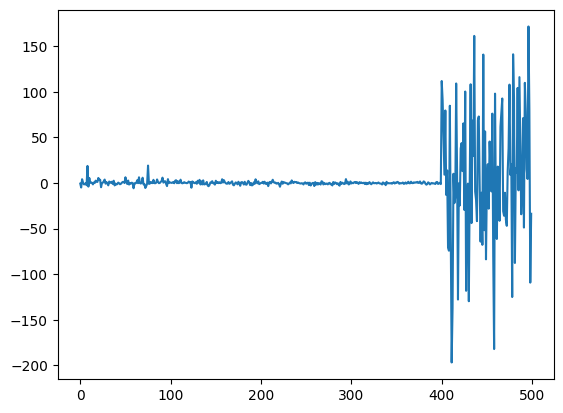

In [215]:
plt.plot(median)

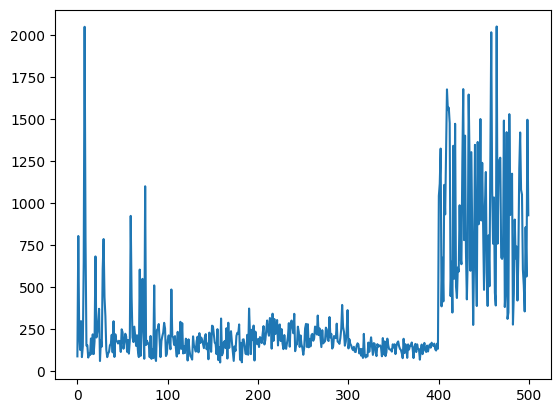

In [216]:
plt.plot(max)

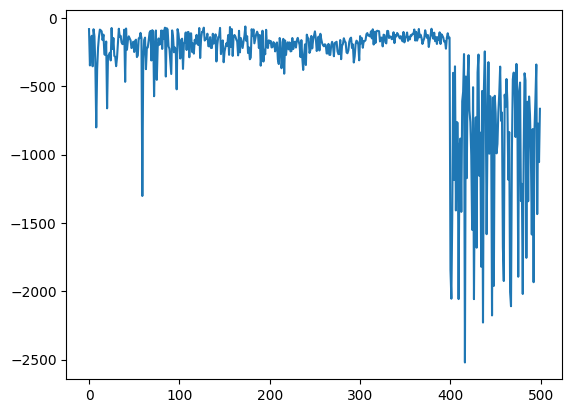

In [217]:
plt.plot(min)

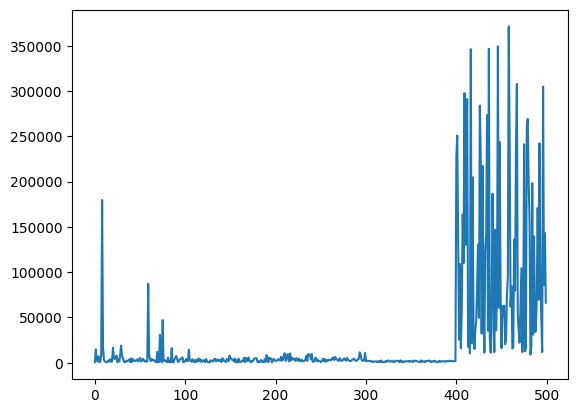

In [218]:
plt.plot(var)

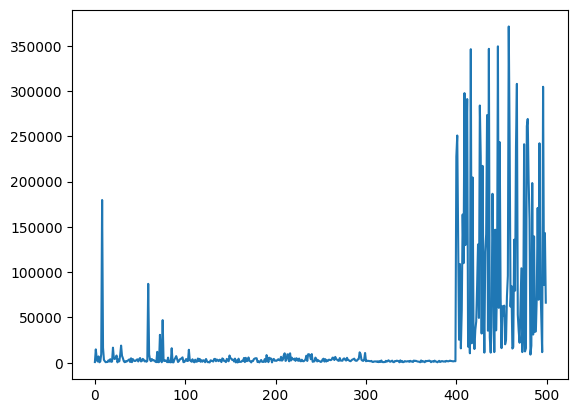

In [219]:
plt.plot(power)

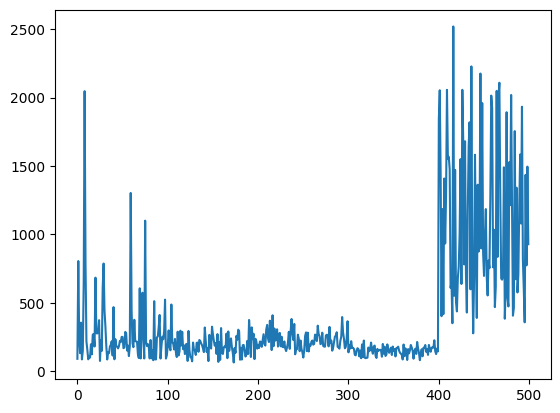

In [220]:
plt.plot(peak)

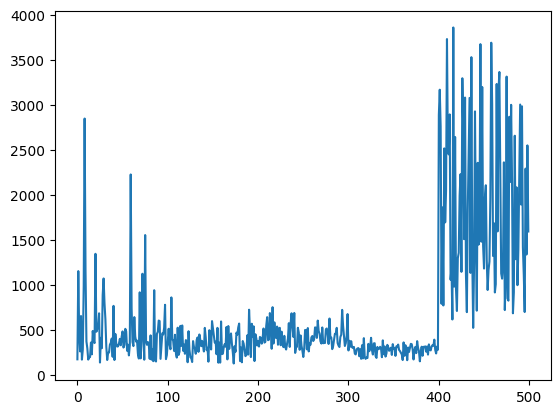

In [221]:
plt.plot(p2p)

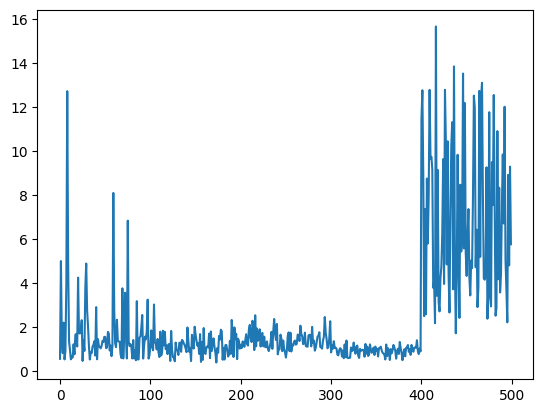

In [222]:
plt.plot(crestFactor)

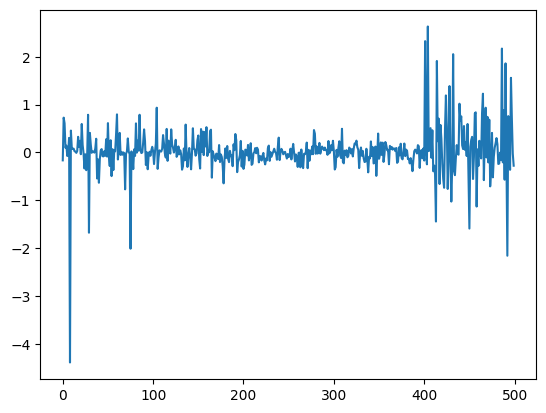

In [223]:
plt.plot(mean)

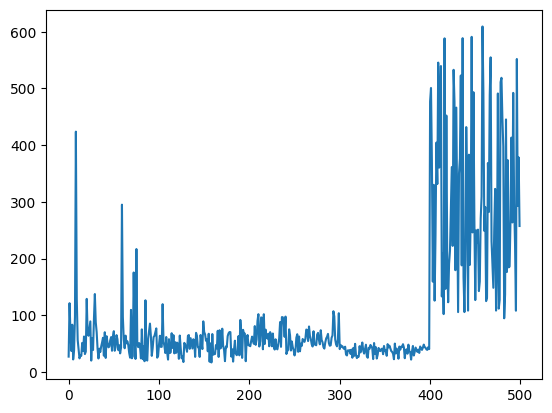

In [224]:
plt.plot(std)

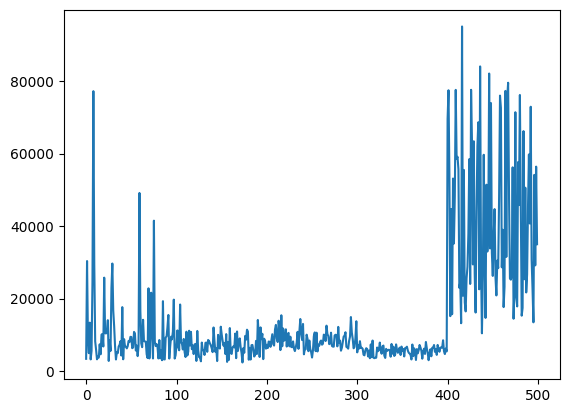

In [225]:
plt.plot(pulseIndicator)

ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it

In [7]:
y=y.ravel()

here I concatenate all the  features together,then I Make a df_features list that its  size is 500*15

In [7]:
df_features=np.concatenate((median.reshape(-1, 1), max.reshape(-1, 1),
    min.reshape(-1, 1),var.reshape(-1, 1), power.reshape(-1, 1),p2p.reshape(-1, 1),
    crestFactor.reshape(-1, 1),mean.reshape(-1,1),std.reshape(-1,1),pulseIndicator.reshape(-1,1),max_f.reshape(-1,1),
    sum_f.reshape(-1,1),mean_f.reshape(-1,1),var_f.reshape(-1,1),peak_f.reshape(-1,1)
                                   ),axis=1)
df_features.shape

(500, 15)

In [66]:
df_features

array([[-6.07788836e-01,  8.93833909e+01, -8.17915996e+01, ...,
         6.04774470e+03,  1.27920288e+09,  8.32462256e+05],
       [-4.89044320e+00,  8.04543485e+02, -3.47531253e+02, ...,
         1.20778888e+05,  6.61871266e+11,  1.85534176e+07],
       [ 4.19985221e+00,  2.19570813e+02, -2.31180138e+02, ...,
         4.11620086e+04,  1.28376283e+11,  1.10116095e+07],
       ...,
       [ 8.09980186e+01,  5.63541969e+02, -7.72968225e+02, ...,
         7.03614084e+05,  1.48331974e+13,  8.49093600e+07],
       [-1.09247042e+02,  1.49525901e+03, -1.05462064e+03, ...,
         1.17331183e+06,  1.60649972e+13,  6.94549912e+07],
       [-3.37191314e+01,  9.27806678e+02, -6.64750904e+02, ...,
         5.43267826e+05,  6.36057080e+12,  3.31624875e+07]])

SVM MACHINE LEARNING ALGORITHM:
first of all, I run a grid search on our data to find the best parameters for this algorithm
parameters that I want to tune:

C=Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive
KERNEL=Specifies the kernel type to be used in the algorithm


gridsesarch parametrs:
name of tha model
parametrs for tuning
refit=Refit an estimator using the best found parameters on the whole dataset
verbose>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.

In [229]:
svmclassifier = SVC()
param_grid = {'C': [0.1, 1, 10], 
              'kernel': ['linear','rbf','sigmoid','poly'],
              'max_iter': [2000000]
              } 
grid = GridSearchCV(svmclassifier, param_grid, refit = True, verbose = 3)
grid.fit(df_features, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.7s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.5s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.4s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=0.1, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 2/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 3/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 4/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 5/5] END C=0.1, kernel=rbf, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 1/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 2/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.870 total time=   0.0s
[CV 3/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.870 total time=   0.0s
[CV 4/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.860 total time=   0.0s
[CV 5/5] END C=0.1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 1/5] END C=0.1, kernel=poly, max_iter=2000000;, score=0.870 total time=

d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.7s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=1, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.2s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=1, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.4s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=1, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=1, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 2/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 3/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.930 total time=   0.0s
[CV 4/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.930 total time=   0.0s
[CV 5/5] END .C=1, kernel=rbf, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 1/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 2/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 3/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 4/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 5/5] END C=1, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 1/5] END C=1, kernel=poly, max_iter=2000000;, score=0.880 total time=   0.0s
[CV 2/5] EN

d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, kernel=linear, max_iter=2000000;, score=0.100 total time=   1.6s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, kernel=linear, max_iter=2000000;, score=0.880 total time=   2.3s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, kernel=linear, max_iter=2000000;, score=0.900 total time=   1.5s


d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, kernel=linear, max_iter=2000000;, score=0.920 total time=   2.3s
[CV 5/5] END C=10, kernel=linear, max_iter=2000000;, score=0.890 total time=   1.4s
[CV 1/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.910 total time=   0.0s
[CV 2/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.940 total time=   0.0s
[CV 3/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.960 total time=   0.0s
[CV 4/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.940 total time=   0.0s
[CV 5/5] END C=10, kernel=rbf, max_iter=2000000;, score=0.960 total time=   0.0s
[CV 1/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 2/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[CV 3/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.920 total time=   0.0s
[CV 4/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.890 total time=   0.0s
[CV 5/5] END C=10, kernel=sigmoid, max_iter=2000000;, score=0.900 total time=   0.0s
[C

d:\AIproject\aiproject\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=2000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly'],
                         'max_iter': [2000000]},
             verbose=3)

In [230]:
print(grid.best_estimator_)
print(grid.best_params_)

SVC(C=10, max_iter=2000000)
{'C': 10, 'kernel': 'rbf', 'max_iter': 2000000}


after finding hyper parameters, I built a SVM classifier with them 
also I  create a dictionary for scoring parameters.
With k fold functon I split the data to 5 folds,then  by applying the cross_validation function we can have the scoring results

In [231]:
svmclassifier = SVC(random_state=seed, kernel="rbf",C=10,max_iter=20000000)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=svmclassifier, X=df_features, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.0030005 , 0.00200438, 0.00200009, 0.00200653, 0.00200629]),
 'score_time': array([0.00299692, 0.00299644, 0.00200009, 0.00199437, 0.00300121]),
 'test_accuracy_score': array([0.92, 0.95, 0.97, 0.94, 0.94]),
 'test_recall': array([0.73076923, 0.72222222, 0.86956522, 0.71428571, 0.68421053]),
 'test_precision': array([0.95      , 1.        , 1.        , 0.83333333, 1.        ])}

to know witch algorithm is better i used the mean of recall score

In [232]:
np.array(results['test_recall']).mean()

0.7442105821968522

by using standardscaler i normalize the data and i fit the model with this data,we can see that mean of recall score approved.

In [233]:
std=StandardScaler()
df_features_normal=std.fit_transform(df_features)

In [234]:

svmclassifier = SVC(random_state=seed, kernel="rbf",C=10,max_iter=20000000)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=svmclassifier, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00199223, 0.002002  , 0.00200152, 0.0029943 , 0.00300217]),
 'score_time': array([0.00300169, 0.00199938, 0.0020051 , 0.00199938, 0.00200629]),
 'test_accuracy_score': array([0.97, 0.93, 0.99, 0.97, 0.96]),
 'test_recall': array([0.92307692, 0.77777778, 0.95652174, 0.85714286, 0.78947368]),
 'test_precision': array([0.96      , 0.82352941, 1.        , 0.92307692, 1.        ])}

RandomForestClassifier:
for finding hyper parametrs i used RandomizedSearchCV function
n_estimators:number of trees in the random forest
max_features:number of features in consideration at every split
max_depth:maximum number of levels allowed in each decision tree
min_samples_split:minimum sample number to split a node
min_samples_leaf: minimum sample number that can be stored in a leaf node
bootstrap:method used to sample data points

In [235]:
n_estimators = [5,20,50,100] 
max_features = ['auto', 'sqrt'] 
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] 
min_samples_split = [2, 6, 10] 
min_samples_leaf = [1, 3, 4] 
bootstrap = [True, False] 
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap}

In [236]:
rfc = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rfc,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=seed, n_jobs = -1)

In [237]:
rf_random.fit(df_features, y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


d:\AIproject\aiproject\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=57, verbose=2)

In [238]:
rf_random.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

after finding hyper parametrs,we do exact work that we did for svm

In [239]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=60,random_state=seed,min_samples_leaf=1,max_features='auto',bootstrap=False)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)
}
kfold = KFold(n_splits=5 ,random_state=seed, shuffle=True)
results = cross_validate(estimator=rfc, X=df_features, y=y, cv=kfold, scoring=scoring )
results

d:\AIproject\aiproject\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\AIproject\aiproject\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
d:\AIproject\aiproject\lib\site-packages\sklearn\ensemble\_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for Random

{'fit_time': array([0.01100183, 0.01000476, 0.00800061, 0.00800753, 0.0089891 ]),
 'score_time': array([0.00300097, 0.00300145, 0.00300264, 0.0030005 , 0.00300002]),
 'test_accuracy_score': array([0.93, 0.95, 1.  , 0.93, 0.96]),
 'test_recall': array([0.80769231, 0.88888889, 1.        , 0.92857143, 0.94736842]),
 'test_precision': array([0.91304348, 0.84210526, 1.        , 0.68421053, 0.85714286])}

mean of recall score for randomforest

In [240]:
np.array(results['test_recall']).mean()

0.9145042092410515

ploting confusion matrix and roc_curve for best algorithm

In [61]:
x_train, x_test, y_train, y_test = train_test_split(df_features, y, random_state=10, shuffle=True)
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)
ConfusionMatrixDisplay(rfc,x_test, y_test, normalize="true")

NameError: name 'rfc' is not defined

c:\Users\Yasmin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


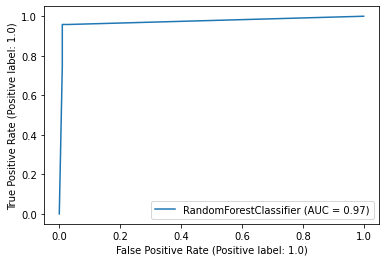

In [ ]:
RocCurveDisplay(rfc,x_test,y_test)

check df_features_normal for rfc

In [ ]:
rfc = RandomForestClassifier(random_state=seed)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)
}
kfold = KFold(n_splits=5 ,random_state=seed, shuffle=True)
results = cross_validate(estimator=rfc, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.10802174, 0.12303209, 0.11011147, 0.10602403, 0.11803174]),
 'score_time': array([0.00900269, 0.00799608, 0.00700092, 0.00800157, 0.01000214]),
 'test_accuracy_score': array([0.97, 0.97, 1.  , 0.96, 0.97]),
 'test_recall': array([0.96153846, 0.94444444, 1.        , 0.92857143, 0.94736842]),
 'test_precision': array([0.92592593, 0.89473684, 1.        , 0.8125    , 0.9       ])}

KNN:
paremtrs for tuning:
n_neighbors:Number of neighbors to use by default for kneighbors queries.
weights:Weight function used in prediction
p=Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2

In [ ]:
grid_params = { 'n_neighbors' : [2,4,6,8,10,12],
               'weights' : ['uniform','distance'],
               'p':[1,2]}
knn_2 = KNeighborsClassifier()
gs = GridSearchCV(knn_2, grid_params, verbose = 1, cv=3, n_jobs = -1)
gs.fit(df_features,y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [ ]:
gs.best_params_

{'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

In [ ]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 4, p=1,weights='distance')
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=knn, X=df_features, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00257611, 0.00200176, 0.0019989 , 0.00199866, 0.00200152]),
 'score_time': array([0.00242305, 0.00300121, 0.00300074, 0.00200248, 0.00300074]),
 'test_accuracy_score': array([0.94, 0.97, 0.96, 0.93, 0.91]),
 'test_recall': array([0.84615385, 0.94444444, 0.91304348, 0.78571429, 0.89473684]),
 'test_precision': array([0.91666667, 0.89473684, 0.91304348, 0.73333333, 0.70833333])}

In [ ]:
np.array(results['test_recall']).mean()

0.8768185793357418

In [ ]:
knn = KNeighborsClassifier(leaf_size= 1, n_neighbors= 29, p=1)
scoring = {
    'accuracy_score': make_scorer(accuracy_score),
    'recall':make_scorer(recall_score),
    'precision':make_scorer(precision_score)

}
kfold = KFold(n_splits=5, random_state=seed, shuffle=True)
results = cross_validate(estimator=knn, X=df_features_normal, y=y, cv=kfold, scoring=scoring )
results

{'fit_time': array([0.00199676, 0.00200081, 0.00198579, 0.00300169, 0.00201035]),
 'score_time': array([0.00600529, 0.00601625, 0.00599957, 0.00700331, 0.00699306]),
 'test_accuracy_score': array([0.96, 0.94, 0.99, 0.96, 0.96]),
 'test_recall': array([0.88461538, 0.77777778, 0.95652174, 0.85714286, 0.84210526]),
 'test_precision': array([0.95833333, 0.875     , 1.        , 0.85714286, 0.94117647])}

from here i get the correlation between features.Good feature subsets contain features highly correlated with the target, yet uncorrelated to each other.I will demonstrate how to select features based on correlation using 2 procedures:
The first one is a brute force function that finds correlated features without any further insight.
The second procedure finds groups of correlated features, which we can then explore to decide which one we keep and which ones we discard.

In [8]:
new_df_features=pd.DataFrame(df_features,columns=['median','max','min','var','power','p2p','crestfactor','mean','std','puseindactor','max_f','sum_F','mean_f','var_f','peak_f'])

In [9]:
df_features=pd.DataFrame(df_features,columns=new_df_features.keys())
df_features

,median,max,min,var,power,p2p,crestfactor,mean,std,puseindactor,max_f,sum_F,mean_f,var_f,peak_f
0,-0.607789,89.383391,-81.791600,738.042319,738.069893,171.174991,0.555131,-0.166056,27.166934,3372.084777,8.324623e+05,2.477761e+07,6.047745e+03,1.279203e+09,8.324623e+05
1,-4.890443,804.543485,-347.531253,14739.389523,14739.918042,1152.074737,4.996755,0.726993,121.405888,30352.270248,1.855342e+07,4.948311e+08,1.207789e+05,6.618713e+11,1.855342e+07
2,4.199852,219.570813,-231.180138,5023.062560,5023.432824,450.750951,1.435784,0.608493,70.873567,8721.519909,1.101161e+07,1.686407e+08,4.116201e+04,1.283763e+11,1.101161e+07
3,0.784477,128.237677,-130.757794,1378.666396,1378.675896,258.995471,0.812094,0.097465,37.130397,4932.978731,1.282172e+06,4.628328e+07,1.129687e+04,3.757706e+09,1.282172e+06
4,-1.423534,298.912294,-353.849388,6961.732702,6961.753080,652.761682,2.197642,0.142751,83.436998,13349.349616,3.830039e+06,2.337117e+08,5.704460e+04,5.846522e+10,3.830039e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,4.462132,356.329974,-340.805478,11691.905692,11692.037782,697.135452,2.213048,-0.363442,108.129116,13442.932403,1.050435e+07,3.925113e+08,9.580456e+04,1.930874e+11,1.050435e+07
496,171.757234,856.852344,-1435.098704,304670.419119,304672.851043,2291.951049,8.912926,1.559463,551.969582,54140.645619,3.283063e+08,1.022812e+10,2.496489e+06,2.270088e+14,3.283063e+08
497,80.998019,563.541969,-772.968225,85868.934091,85869.426882,1336.510194,4.800651,0.701991,293.034015,29161.059519,8.490936e+07,2.882707e+09,7.036141e+05,1.483320e+13,8.490936e+07
498,-109.247042,1495.259010,-1054.620642,143191.582659,143191.583207,2549.879652,9.286562,-0.023410,378.406637,56410.258031,6.945499e+07,4.807059e+09,1.173312e+06,1.606500e+13,6.945499e+07


visualise correlated features:
I will build a correlation matrix, which examines the 
correlation of all features and then visualise the correlation matrix using a heatmap.
the default correlation method of pandas.corr is pearson

<AxesSubplot: >

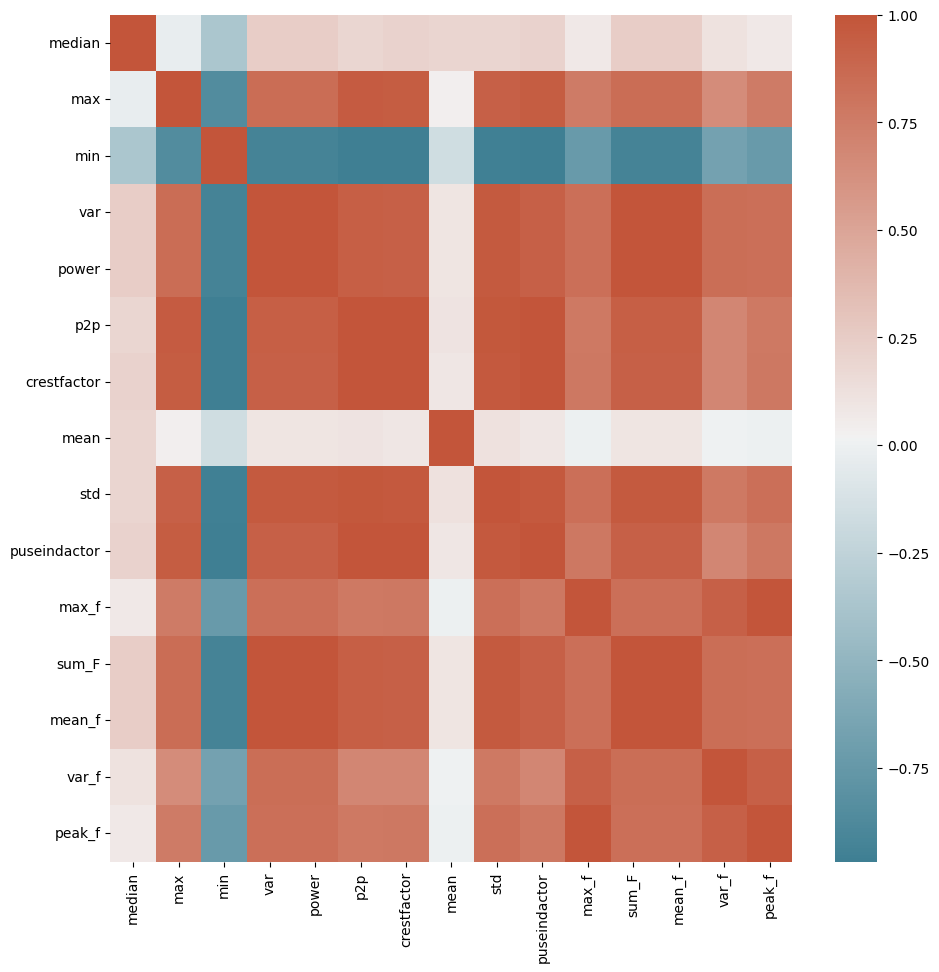

In [10]:
corrmat = new_df_features.corr(method='pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap=cmap)

correlation function show how features are correlated with each other 

In [11]:
def correlation(dataset):
    corr_matrix = dataset.corr(method='pearson')
    return corr_matrix

In [12]:
corr_features = correlation(df_features)


In [13]:
corr_features

,median,max,min,var,power,p2p,crestfactor,mean,std,puseindactor,max_f,sum_F,mean_f,var_f,peak_f
median,1.000000,-0.023051,-0.364596,0.243934,0.243936,0.189688,0.213137,0.196333,0.199068,0.213137,0.076305,0.243936,0.243936,0.110701,0.076305
max,-0.023051,1.000000,-0.856563,0.853608,0.853610,0.958717,0.950516,0.033498,0.927024,0.950516,0.755829,0.853610,0.853610,0.649388,0.755829
min,-0.364596,-0.856563,1.000000,-0.936786,-0.936786,-0.967944,-0.964012,-0.163843,-0.954091,-0.964012,-0.730793,-0.936786,-0.936786,-0.673825,-0.730793
var,0.243934,0.853608,-0.936786,1.000000,1.000000,0.931672,0.929652,0.096031,0.964096,0.929652,0.838075,1.000000,1.000000,0.839296,0.838075
power,0.243936,0.853610,-0.936786,1.000000,1.000000,0.931673,0.929653,0.096028,0.964097,0.929653,0.838078,1.000000,1.000000,0.839297,0.838078
p2p,0.189688,0.958717,-0.967944,0.931672,0.931673,1.000000,0.993841,0.106588,0.976940,0.993841,0.770571,0.931673,0.931673,0.687373,0.770571
crestfactor,0.213137,0.950516,-0.964012,0.929652,0.929653,0.993841,1.000000,0.088869,0.971262,1.000000,0.777238,0.929653,0.929653,0.686335,0.777238
mean,0.196333,0.033498,-0.163843,0.096031,0.096028,0.106588,0.088869,1.000000,0.120875,0.088869,-0.001509,0.096028,0.096028,0.001988,-0.001509
std,0.199068,0.927024,-0.954091,0.964096,0.964097,0.976940,0.971262,0.120875,1.000000,0.971262,0.837562,0.964097,0.964097,0.769444,0.837562
puseindactor,0.213137,0.950516,-0.964012,0.929652,0.929653,0.993841,1.000000,0.088869,0.971262,1.000000,0.777238,0.929653,0.929653,0.686335,0.777238


here,  each feature in df_feature is a root node for decisiontree to see which one is has the more accuracy

In [74]:
accuracy_dict=dict()
for feature in df_features:
    x_train,x_test,y_train,y_test=train_test_split(df_features[feature].values.reshape(-1,1),y,random_state=seed,test_size=0.2)
    classifier=tree.DecisionTreeClassifier().fit(x_train,y_train)
    prediction=classifier.predict(x_test)
    accuracy_test=accuracy_score(y_test,prediction)
    accuracy_dict[feature]=accuracy_test   

In [75]:
accuracy_dict

{'median': 0.98,
 'max': 0.9,
 'min': 0.93,
 'var': 0.93,
 'power': 0.93,
 'p2p': 0.94,
 'crestfactor': 0.9,
 'mean': 0.72,
 'std': 0.93,
 'puseindactor': 0.9,
 'max_f': 0.88,
 'sum_F': 0.93,
 'mean_f': 0.93,
 'var_f': 0.92,
 'peak_f': 0.88}

here we want to calculate f1 score,first we have to tuple,if the feauture is not in chosen list,calculate min correlation and because we want to calculate this with accuracy we set correlation=correlation-1
now we check our condidate's f1 score we the last feauture and update it if it is bigger .

In [15]:
def select_feature(chosen_features: list):
    chosen = (None, 0)
    candidate = (None, 0)
    for feature in df_features:
        if feature not in chosen_features:
            corelationtest = 1
            for features in chosen_features:
                if corr_features[feature][features] < corelationtest:
                    corelationtest = corr_features[feature][features]
            corelationtest = 1 - corelationtest
            f1 = 2*((corelationtest* accuracy_dict[feature])/(corelationtest+accuracy_dict[feature]))
            # return(f1)
            candidate = (feature, f1)
        if candidate[1] > chosen[1]:
            chosen = candidate
            print(chosen)
    return chosen[0]


In [16]:
# accuracy_dict = pd.DataFrame(accuracy_dict)
chosen_features = ['median']
for i in range(4):
    chosen_features.append(select_feature(chosen_features))
print(chosen_features)

('max', 0.9575887636509386)
('min', 1.1061416850611734)
('max', 1.2123116945733579)
('var', 1.2566064457630608)
('power', 1.2566064899975384)
('p2p', 1.2722854199589222)
('max', 1.2123116945733579)
('var', 1.2566064457630608)
('power', 1.2566064899975384)
('std', 1.2602268855324399)
('max', 1.2123116945733579)
('var', 1.2566064457630608)
('power', 1.2566064899975384)
['median', 'min', 'p2p', 'std', 'power']


In [26]:
chosen_features

['median', 'min', 'p2p', 'std', 'power']

here is our selected features:

In [63]:
df_features_selection=np.concatenate((median.reshape(-1, 1),
    min.reshape(-1, 1),p2p.reshape(-1, 1),
    std.reshape(-1,1),power.reshape(-1,1)),axis=1)
df_features_selection.shape

(500, 5)

In [64]:
df_features_selection=pd.DataFrame(df_features_selection)
df_features_selection.shape

(500, 5)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(df_features_selection, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


here,we have a function get_clusters .In this function,first we have a clustering algorithm which is kmeans with 5 clusters,after fitting our data we have train labels,we can predict x_test with this machine and obviously we have test labels.after that we have a classification algorithm which takes train labels as its features.we fit the data and predict test labels.the accuracy with randomforest was around 0.90 but with using clustering before classification tha accuracy has been improved to 0.92

In [225]:
def get_clusters(X_train,X_test,y_train,y_test):
    n_clusters=5
    clustering = KMeans(n_clusters=n_clusters, random_state=seed)
    clustering.fit(X_train)
    train_labels = clustering.labels_
    test_labels = clustering.predict(X_test)
    model = RandomForestClassifier(random_state=seed).fit(train_labels.reshape(-1,1), y_train)
    y_pred = model.predict(test_labels.reshape(-1,1))
    return accuracy_score(y_test, y_pred)

In [226]:
get_clusters(X_train,X_test,y_train,y_test)

d:\AIproject\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_18192\2279598371.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(random_state=seed).fit(train_labels.reshape(-1,1), y_train)


0.928

we had five type of data in our dataset. 0-100 & 100-200 & 200-300 who are normal people and 400-500 who had seizure attack:

In [227]:
x=np.concatenate((df_features_selection[:100],df_features_selection[400:500]))
print(x.shape)
y=np.concatenate((np.ones(100),np.zeros(100)))
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
get_clusters(X_train,X_test,y_train,y_test)

(200, 5)
(200,)
(150, 5)
(50, 5)
(150,)
(50,)


d:\AIproject\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.88

In [235]:
x=np.concatenate((df_features_selection[100:200],df_features_selection[400:500]))
print(x.shape)
y=np.concatenate((np.ones(100),np.zeros(100)))
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
get_clusters(X_train,X_test,y_train,y_test)

(200, 5)
(200,)
(150, 5)
(50, 5)
(150,)
(50,)


d:\AIproject\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9

In [238]:
x=np.concatenate((df_features_selection[200:300],df_features_selection[400:500]))
print(x.shape)
y=np.concatenate((np.ones(100),np.zeros(100)))
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
get_clusters(X_train,X_test,y_train,y_test)

(200, 5)
(200,)
(150, 5)
(50, 5)
(150,)
(50,)


d:\AIproject\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9

In [237]:
x=np.concatenate((df_features_selection[:200],df_features_selection[200:400],df_features_selection[400:500]))
print(x.shape)
y = np.concatenate((np.zeros((400,1)),np.ones((100,1))))
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
get_clusters(X_train,X_test,y_train,y_test)

(500, 5)
(500, 1)
(375, 5)
(125, 5)
(375, 1)
(125, 1)


d:\AIproject\aiproject\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yasmin\AppData\Local\Temp\ipykernel_18192\2279598371.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(random_state=seed).fit(train_labels.reshape(-1,1), y_train)


0.928